In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

/Users/saajan/Desktop/learning_langgraph/.venv/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    number3 : int
    number4 : int
    op1 : str
    op2 : str
    res1 : int
    res2 : int

In [3]:
def addition_1_node(state: AgentState) -> AgentState:
    """addition node 1"""

    state['res1'] = state['number1'] + state['number2']

    return state

def subtraction_1_node(state: AgentState) -> AgentState:
    """subtraction node 1"""

    state['res1'] = state['number1'] - state['number2']

    return state

def decide_1_node(state: AgentState) -> AgentState:
    """decide next node 1"""

    if state['op1'] == '+':
        return 'addition_operation_1'
    else: 
        return 'subtraction_operation_1'


In [4]:
def addition_2_node(state: AgentState) -> AgentState:
    """addition node 2"""

    state['res2'] = state['number3'] + state['number4']

    return state

def subtraction_2_node(state: AgentState) -> AgentState:
    """subtraction node 2"""

    state['res2'] = state['number3'] - state['number4']
    
    return state

def decide_2_node(state: AgentState) -> AgentState:
    """decide next node 2"""

    if state['op2'] == '+':
        return 'addition_operation_2'
    else: 
        return 'subtraction_operation_2'

In [5]:
graph = StateGraph(AgentState)

graph.add_node("addition_1_node", addition_1_node)
graph.add_node("subtraction_1_node", subtraction_1_node)

graph.add_node("addition_2_node", addition_2_node)
graph.add_node("subtraction_2_node", subtraction_2_node)

graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")

graph.add_conditional_edges("router1",
                            decide_1_node,
                            {
                                'addition_operation_1':"addition_1_node",
                                'subtraction_operation_1':"subtraction_1_node",
                            })

graph.add_edge("addition_1_node", "router2")
graph.add_edge("subtraction_1_node", "router2")

graph.add_conditional_edges("router2",
                            decide_2_node,
                            {
                                'addition_operation_2':"addition_2_node",
                                'subtraction_operation_2':"subtraction_2_node",
                            })

graph.add_edge("addition_2_node", END)
graph.add_edge("subtraction_2_node", END)

app = graph.compile()


In [8]:
app.invoke(
    {
        'number1': 4,
        'number2': 3,
        'number3': 6,
        'number4': 9,
        'op1': '+',
        'op2': '-'
    }
)

{'number1': 4,
 'number2': 3,
 'number3': 6,
 'number4': 9,
 'op1': '+',
 'op2': '-',
 'res1': 7,
 'res2': -3}

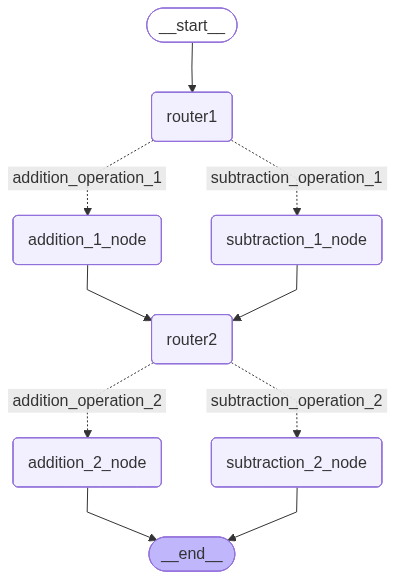

In [9]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))